<a href="https://colab.research.google.com/github/mayuravaani/AI/blob/main/MLwithsignalProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import wavfile
freq_sample, sig_audio = wavfile.read("/content/Welcome.wav")


FileNotFoundError: ignored

# New Section

In [1]:

#The usual collection of indispensables 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack

# And the tf and keras framework
import tensorflow as tf
from tensorflow import keras

In [2]:
def dnn_keras_tspred_model():
  model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.Adam()
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae']) 
  model.summary()
  return model

In [3]:
num_train_data = 4000
num_test_data = 1000
timestep = 0.1
tm =  np.arange(0, (num_train_data+num_test_data)*timestep, timestep);
print(tm)
y = np.sin(tm) + np.sin(tm*np.pi/2) + np.sin(tm*(-3*np.pi/2)) 
SNR = 10
ypn = y + np.random.normal(0,10**(-SNR/20),len(y))

[0.000e+00 1.000e-01 2.000e-01 ... 4.997e+02 4.998e+02 4.999e+02]


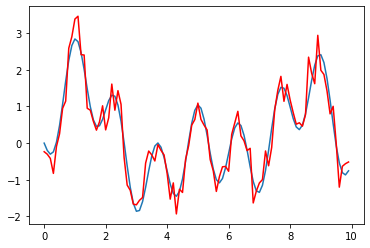

In [5]:
plt.plot(tm[0:100],y[0:100])
plt.plot(tm[0:100],ypn[0:100],'r') # red one is the noisy signal
plt.show()

In [6]:
# prepare the train_data and train_labels
dnn_numinputs = 64
num_train_batch = 0
train_data = []
for k in range(num_train_data-dnn_numinputs-1):
  train_data = np.concatenate((train_data,ypn[k:k+dnn_numinputs]));
  num_train_batch = num_train_batch + 1  
train_data = np.reshape(train_data, (num_train_batch,dnn_numinputs))
train_labels = y[dnn_numinputs:num_train_batch+dnn_numinputs]

In [ ]:
# prepare the train_data and train_labels
dnn_numinputs = 64
num_train_batch = 0
train_data = []
for k in range(num_train_data-dnn_numinputs-1):
  train_data = np.concatenate((train_data,ypn[k:k+dnn_numinputs]));
  num_train_batch = num_train_batch + 1  
train_data = np.reshape(train_data, (num_train_batch,dnn_numinputs))
train_labels = y[dnn_numinputs:num_train_batch+dnn_numinputs]

In [7]:
print(y.shape, train_data.shape, train_labels.shape)

(5000,) (3935, 64) (3935,)


In [8]:
model = dnn_keras_tspred_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


DNN training done. Time elapsed:  25.358669 s


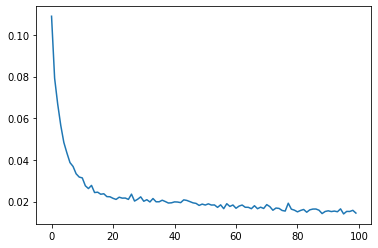

In [9]:
EPOCHS = 100
strt_time = datetime.datetime.now()
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                  validation_split=0.2, verbose=0,
                  callbacks=[])
curr_time = datetime.datetime.now()
timedelta = curr_time - strt_time
dnn_train_time = timedelta.total_seconds()
print("DNN training done. Time elapsed: ", timedelta.total_seconds(), "s")
plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
plt.show()

In [10]:
# test how well DNN predicts now
num_test_batch = 0
strt_idx = num_train_batch
test_data=[]
for k in range(strt_idx, strt_idx+num_test_data-dnn_numinputs-1):
  test_data = np.concatenate((test_data,ypn[k:k+dnn_numinputs]))
  num_test_batch = num_test_batch + 1  
test_data = np.reshape(test_data, (num_test_batch, dnn_numinputs))
test_labels = y[strt_idx+dnn_numinputs:strt_idx+num_test_batch+dnn_numinputs]

30/30 [==============================] - 0s 1ms/step


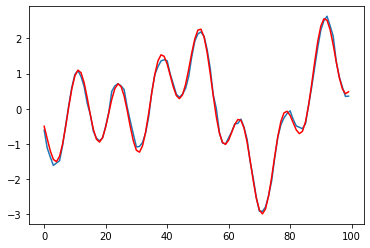

In [11]:
dnn_predictions = model.predict(test_data).flatten()
keras_dnn_err = test_labels - dnn_predictions
plt.plot(dnn_predictions[0:100])
plt.plot(test_labels[0:100],'r')
plt.show()